<a href="https://colab.research.google.com/github/Lvasquez13/buenas-practicas-r/blob/main/Introducci%C3%B3n_a_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a ggplot2
ggplot2 es un paquete R para producir visualizaciones de datos. A diferencia de muchos paquetes de gráficos, ggplot2 utiliza un marco conceptual basado en la gramática de gráficos. Esto le permite "expresar" un gráfico a partir de elementos componibles, en lugar de limitarse a un conjunto predefinido de gráficos.

Para la estructura, repasamos las 7 partes componibles que se unen como un conjunto de instrucciones sobre cómo dibujar un gráfico.

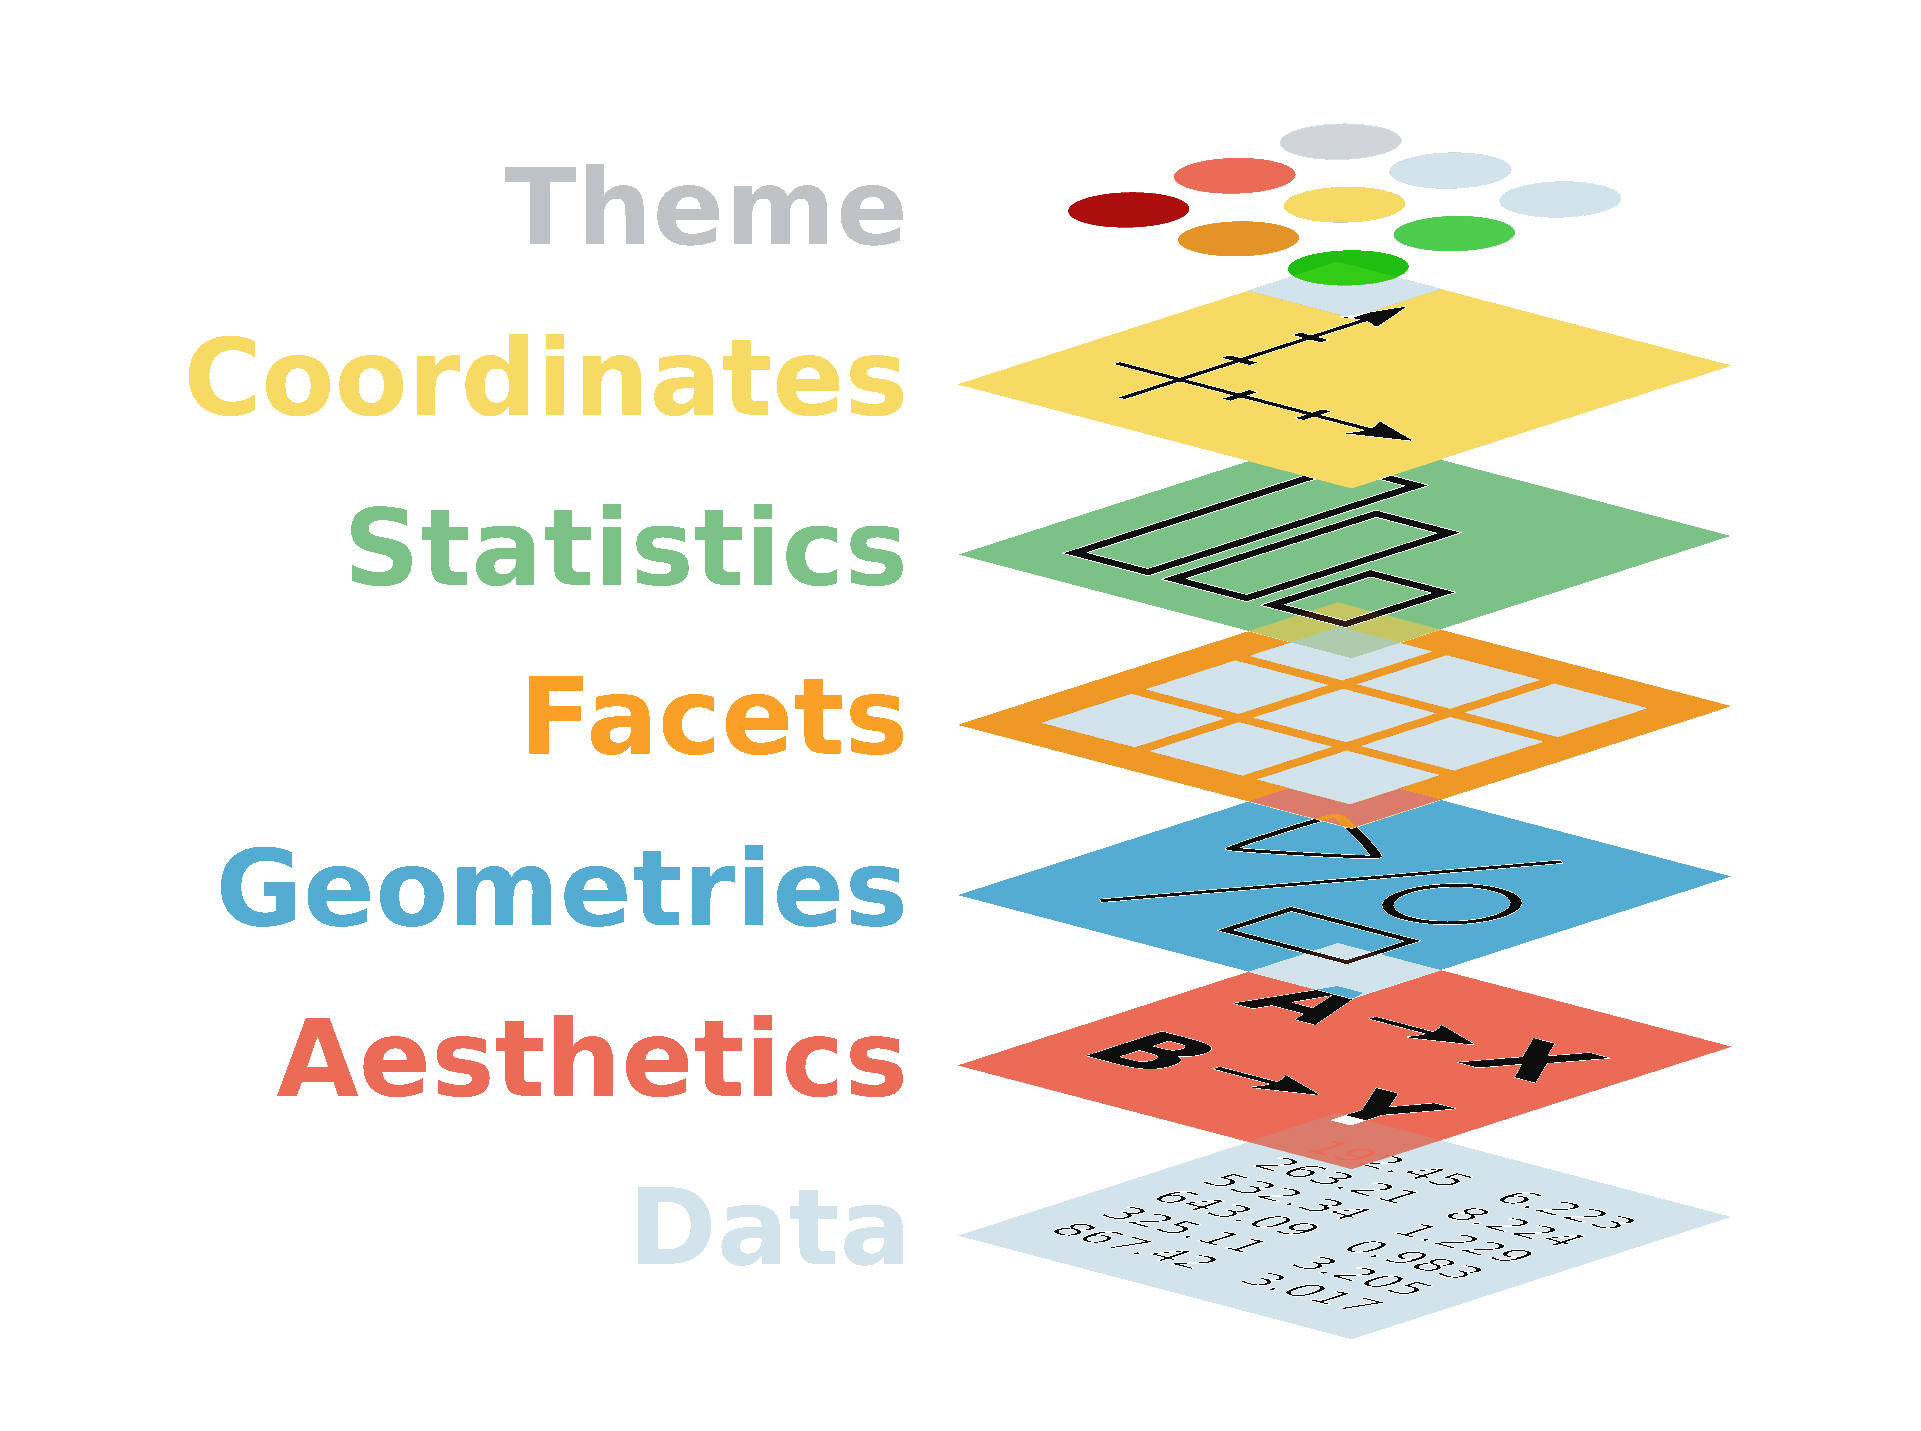

ggplot2 necesita al menos los tres siguientes para producir un gráfico: datos, un mapeo y una capa. Las escalas, facetas, coordenadas y temas tienen valores predeterminados

## Datos
ggplot2 utiliza datos para construir un gráfico. El sistema funciona mejor si los datos se proporcionan en un formato ordenado , lo que en pocas palabras significa una estructura de marco de datos rectangular donde las filas son observaciones y las columnas son variables.

se pasan los datos a la ggplot()función, que almacena los datos para que los utilicen más adelante otras partes del sistema de gráficos. Por ejemplo, si queremos hacer un gráfico sobre el mpgconjunto de datos, comenzaremos de la siguiente manera:

**ggplot(data = mpg)**

## Cartografía
El mapeo de un gráfico es un conjunto de instrucciones sobre cómo se mapean partes de los datos sobre los atributos estéticos de los objetos geométricos. Es el "diccionario" para traducir datos ordenados al sistema gráfico.

Se puede realizar una asignación utilizando la **aes()** función para crear pares de atributos gráficos y partes de los datos. Si queremos que las columnas ctyy hwyse asignen a las coordenadas x e y en el gráfico, podemos hacerlo de la siguiente manera:

**ggplot(mpg, mapping = aes(x = cty, y = hwy))**

## Capas
El corazón de cualquier gráfico son las capas . Éstas toman los datos mapeados y los muestran en algo que los humanos pueden entender como una representación de los datos. Cada capa consta de tres partes importantes:

1. La geometría que determina cómo se muestran los datos, como puntos, líneas o rectángulos.
2.La transformación estadística que puede calcular nuevas variables a partir de los datos y afectar qué parte de los datos se muestra.
3. El ajuste de posición que determina principalmente dónde se muestra una pieza de datos.
Se puede construir una capa utilizando las funciones geom_*()y stat_*(). Estas funciones suelen determinar una de las tres partes de una capa, mientras que las otras dos aún se pueden especificar. Aquí se muestra cómo podemos utilizar dos capas para mostrar las columnas ctyy hwydel conjunto de mpgdatos como puntos y apilar una línea de tendencia encima.



```
  ggplot(mpg, aes(cty, hwy)) +
  #Para crear un diagrama de dispersión.
  geom_point() +
  # Para ajustar y superponer una línea de tendencia LOESS.
  geom_smooth(formula = y ~ x, method = "lm")
```



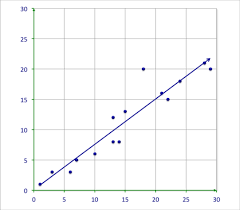

## Escalas
Son importantes para traducir lo que se muestra en el gráfico a una comprensión de los datos. Las escalas suelen formar pares con los atributos estéticos de los gráficos y se representan en los gráficos mediante guías, como ejes o leyendas. Las escalas son responsables de actualizar los límites de un gráfico, establecer los cortes, dar formato a las etiquetas y, posiblemente, aplicar una transformación.

Para utilizar escalas, se puede utilizar una de las funciones de escala que están modeladas como scale_{aesthetic}_{type}()funciones, donde {aesthetic}es uno de los emparejamientos realizados en la parte de mapeo de un gráfico. Para mapear la classcolumna en el mpg conjunto de datos a la paleta de colores de Viridis, podemos escribir lo siguiente:



```
ggplot(mpg, aes(cty, hwy, colour = class)) +
  geom_point() +
  scale_colour_viridis_d()
```



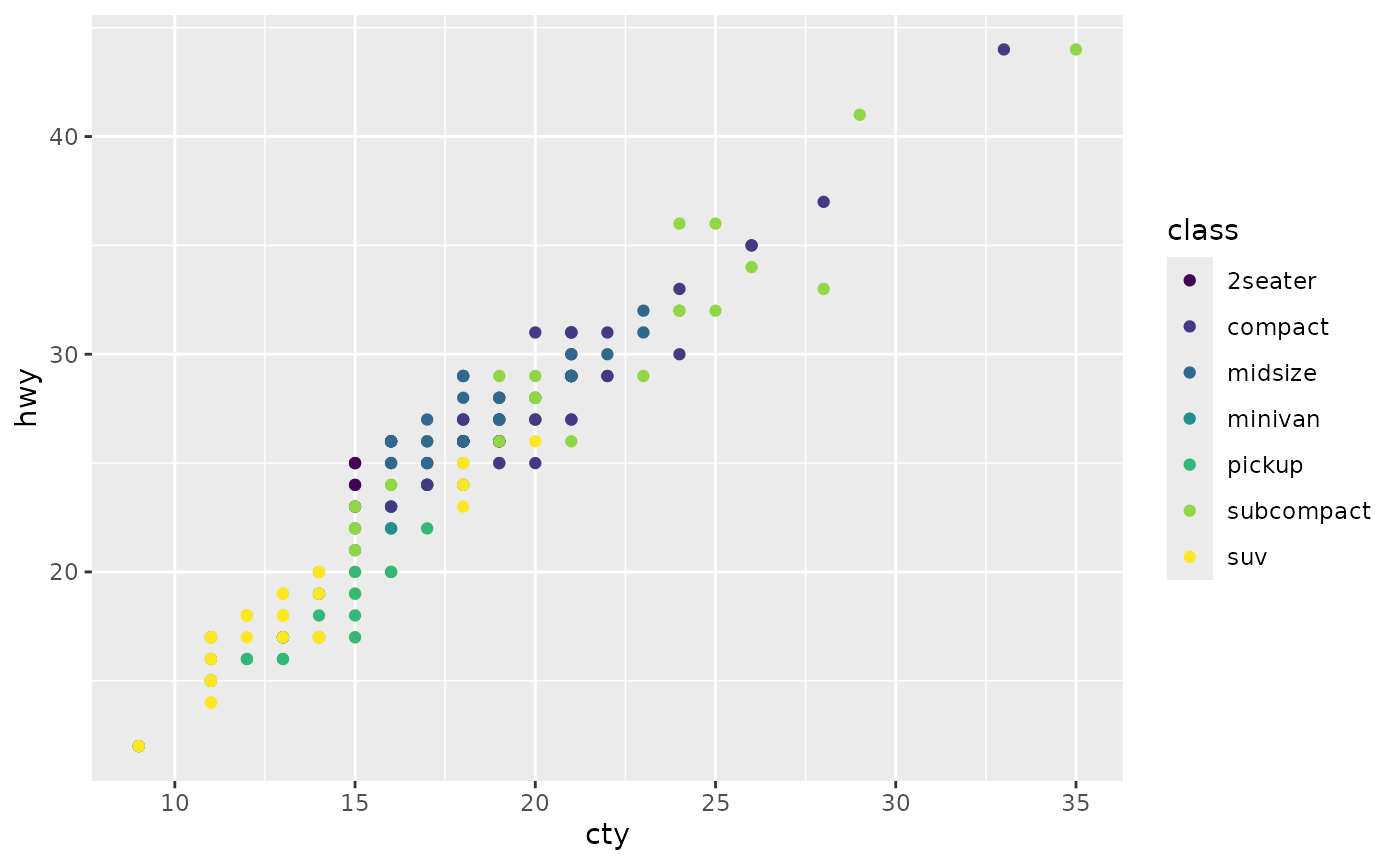

## Facetas
Las facetas se pueden utilizar para separar múltiplos pequeños o diferentes subconjuntos de los datos. Es una herramienta poderosa para dividir rápidamente los datos en paneles más pequeños, en función de una o más variables, para mostrar patrones o tendencias (o la falta de ellas) dentro de los subconjuntos.

Las facetas tienen su propia asignación que se puede dar como fórmula. Para representar gráficamente subconjuntos del mpgconjunto de datos en función de los niveles de las variables drvy year, podemos utilizar facet_grid()lo siguiente:



```
ggplot(mpg, aes(cty, hwy)) +
  geom_point() +
  facet_grid(year ~ drv)
```



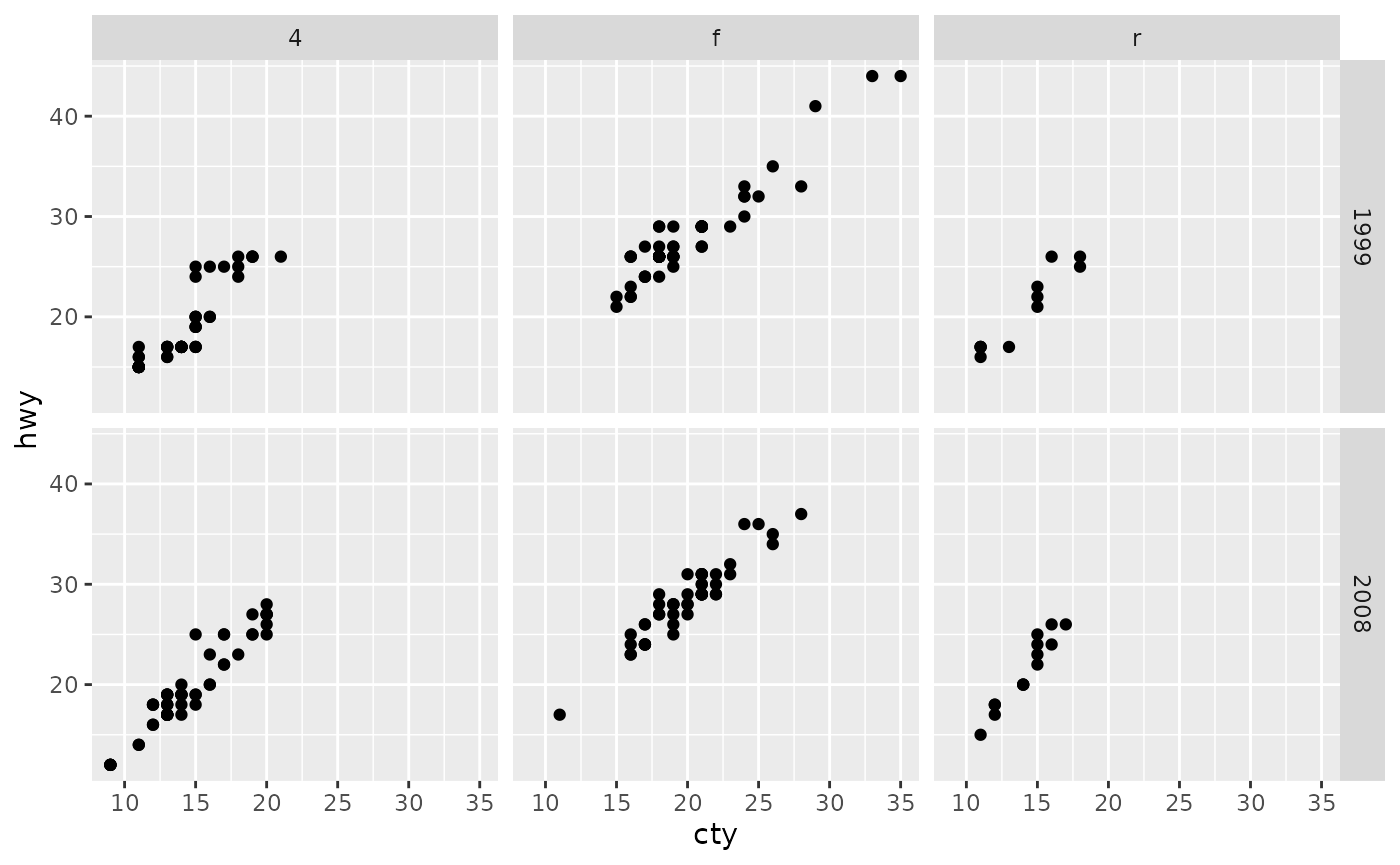

## Coordenadas

Puede ver la parte de coordenadas del gráfico como un intérprete de la estética de la posición. Si bien normalmente se utilizan coordenadas cartesianas, el sistema de coordenadas potencia la visualización de proyecciones de mapas y gráficos polares .

También podemos utilizar coordenadas para mostrar un gráfico con una relación de aspecto fija, de modo que una unidad tenga la misma longitud en las direcciones x e y. La coord_fixed()función establece esta relación automáticamente.


```
ggplot(mpg, aes(cty, hwy)) +
  geom_point() +
  coord_fixed()
```



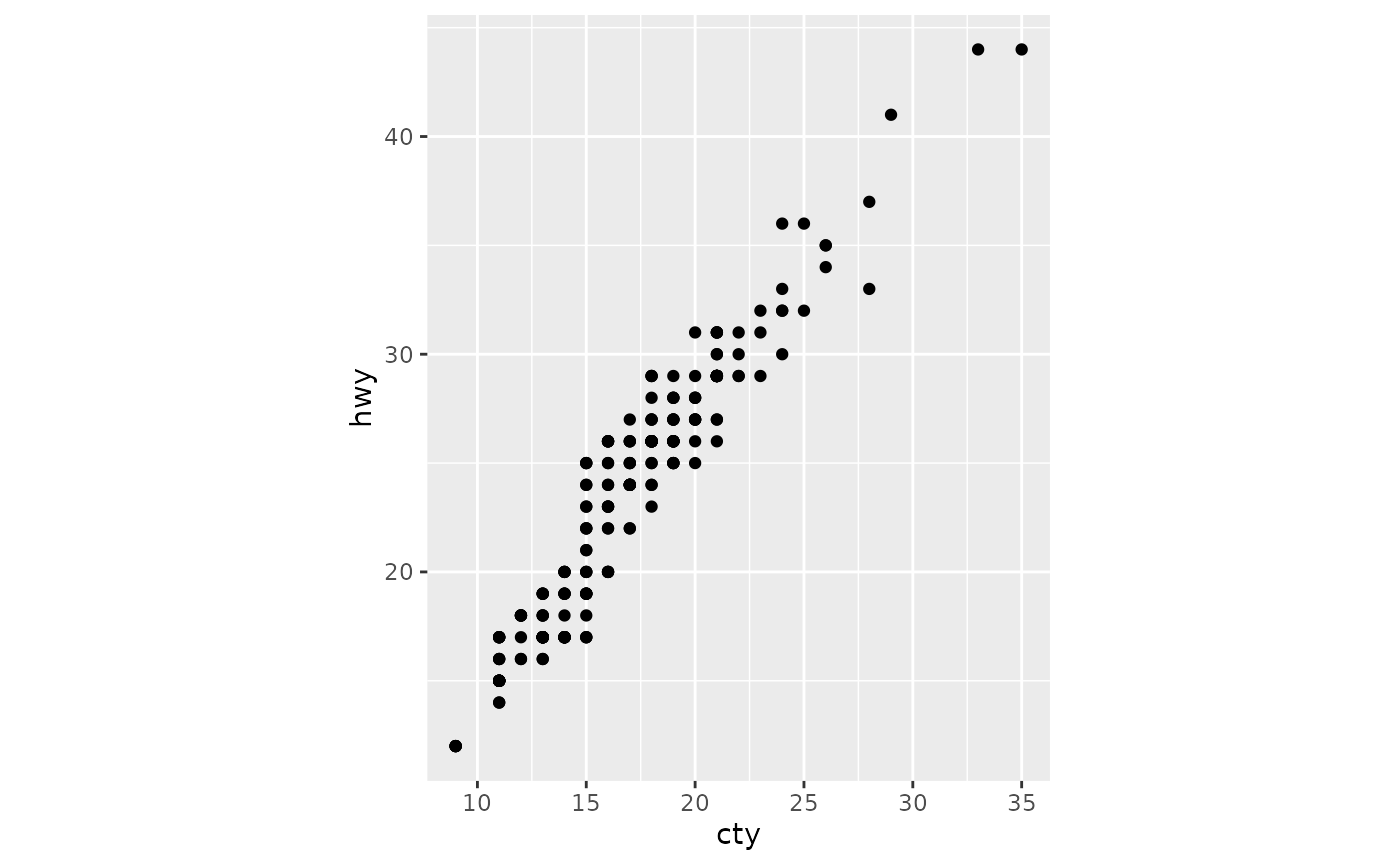

## Tema
El sistema de temas controla casi todos los elementos visuales del gráfico que no están controlados por los datos y, por lo tanto, es importante para la apariencia del gráfico. Puede utilizar el tema para realizar personalizaciones que van desde cambiar la ubicación de las leyendas hasta configurar el color de fondo del gráfico. Muchos elementos del tema son jerárquicos, ya que configurar la apariencia de la línea del eje general afecta simultáneamente a los ejes x e y.

Para modificar el aspecto del gráfico, se pueden utilizar muchas de las funciones integradas theme_*()o detallar aspectos específicos con la theme()función. Las element_*()funciones controlan los atributos gráficos de los componentes del tema.


```
ggplot(mpg, aes(cty, hwy, colour = class)) +
  geom_point() +
  theme_minimal() +
  theme(
    legend.position = "top",
    axis.line = element_line(linewidth = 0.75),
    axis.line.x.bottom = element_line(colour = "blue")
  )
```



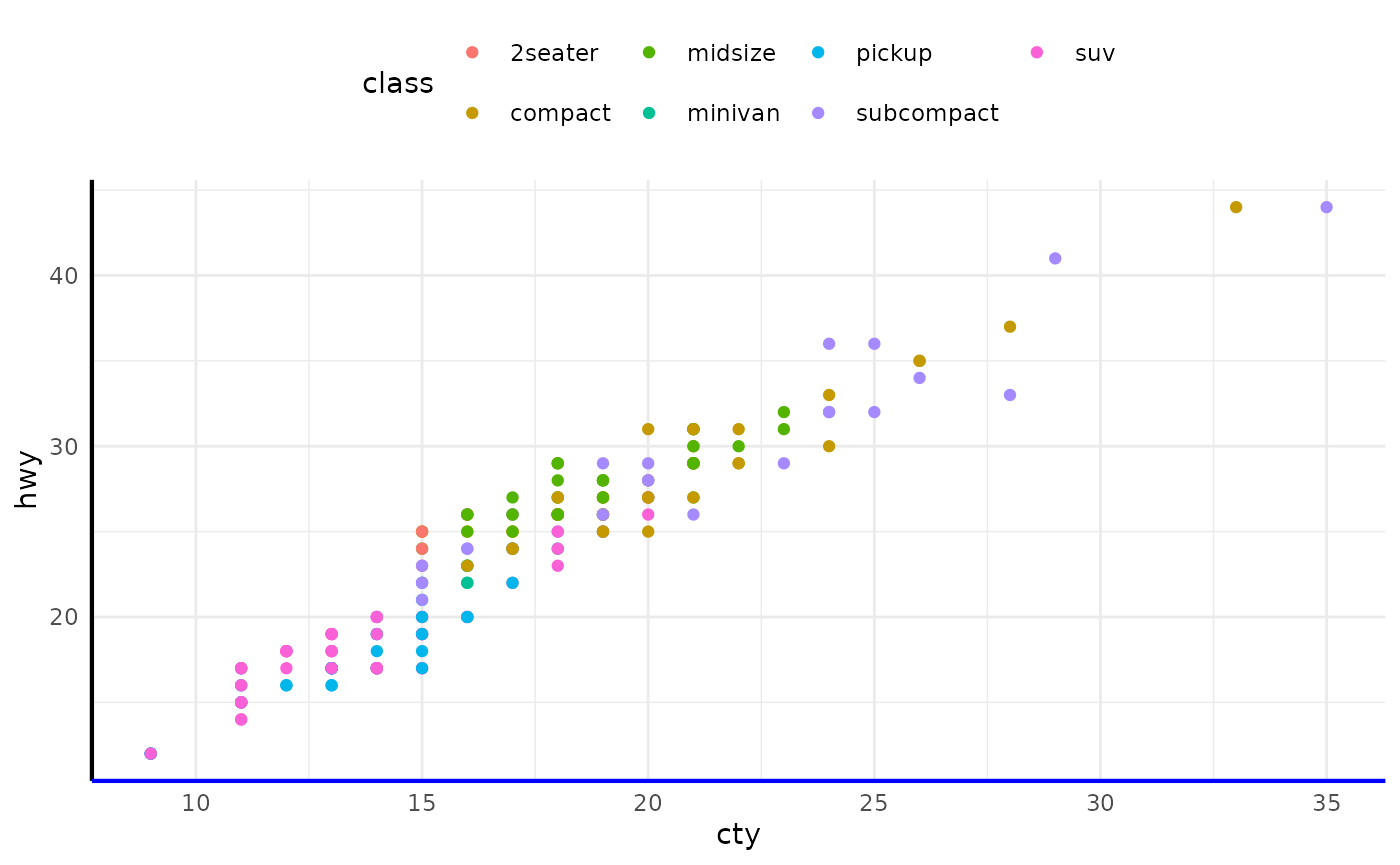

## Combinatorio
Como se mencionó al principio, puedes superponer todas las piezas para crear un gráfico personalizado de tus datos, como el que se muestra al comienzo de esta viñeta:

```
ggplot(mpg, aes(cty, hwy)) +
  geom_point(mapping = aes(colour = displ)) +
  geom_smooth(formula = y ~ x, method = "lm") +
  scale_colour_viridis_c() +
  facet_grid(year ~ drv) +
  coord_fixed() +
  theme_minimal() +
  theme(panel.grid.minor = element_blank())
```



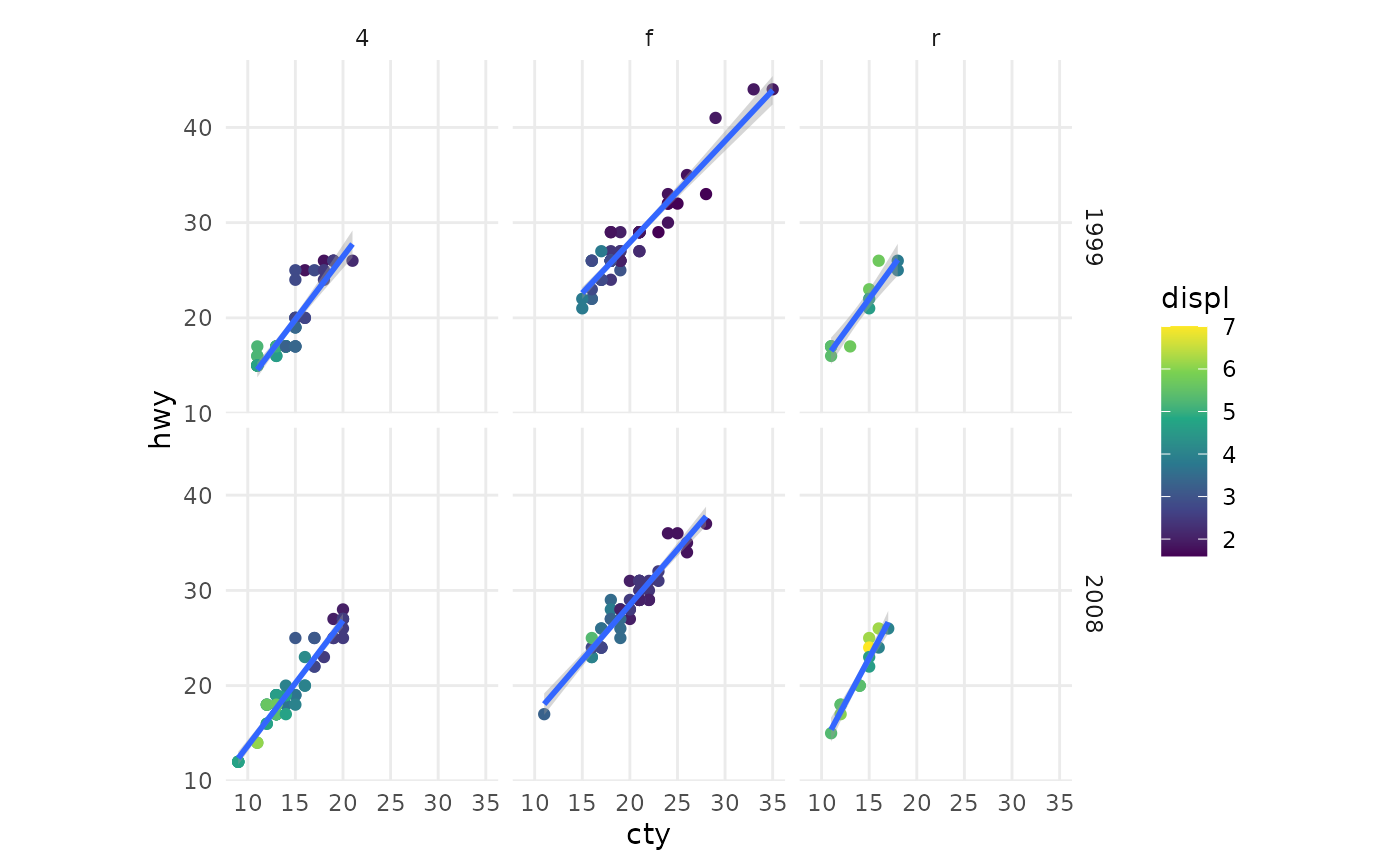